# 2021 Tokyo Summer Olympics Dataset Exploration

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline

In [41]:
tok = pd.read_csv('../datasets/Tokyo 2021 dataset.csv')

In [42]:
tok.head()

,Rank,Team/NOC,Gold Medal,Silver Medal,Bronze Medal,Total,Rank by Total,NOCCode
0,1,United States of America,39,41,33,113,1,USA
1,2,People's Republic of China,38,32,18,88,2,CHN
2,3,Japan,27,14,17,58,5,JPN
3,4,Great Britain,22,21,22,65,4,GBR
4,5,ROC,20,28,23,71,3,ROC


In [43]:
tok.info

<bound method DataFrame.info of     Rank                    Team/NOC  Gold Medal  Silver Medal  Bronze Medal  \
0      1    United States of America          39            41            33   
1      2  People's Republic of China          38            32            18   
2      3                       Japan          27            14            17   
3      4               Great Britain          22            21            22   
4      5                         ROC          20            28            23   
..   ...                         ...         ...           ...           ...   
88    86                       Ghana           0             0             1   
89    86                     Grenada           0             0             1   
90    86                      Kuwait           0             0             1   
91    86         Republic of Moldova           0             0             1   
92    86        Syrian Arab Republic           0             0             1   

    Tot

In [44]:
tok.isnull().sum()

Rank             0
Team/NOC         0
Gold Medal       0
Silver Medal     0
Bronze Medal     0
Total            0
Rank by Total    0
NOCCode          0
dtype: int64

In [45]:
tok = tok.rename(columns=str.lower)

In [133]:
teams = ['United States of America', 'Peoples Republic of China', 'Japan', 'Great Britain', 'ROC', 
    'Australia', 'Netherlands', 'France','Germany','Italy','Canada', 'Brazil','New Zealand', 'Cuba',
    'Hungary','Republic of Korea','Poland','Czech Republic','Kenya','Norway','Jamaica','Spain','Sweden',
    'Switzerland','Denmark','Croatia', 'Islamic Republic of Iran', 'Serbia','Belgium','Bulgaria', 'Slovenia',
    'Uzbekistan','Georgia', 'Chinese Taipei','Turkey','Greece','Uganda','Ecuador','Ireland','Israel','Qatar',
    'Bahamas','Kosovo','Ukraine','Belarus','Romania','Venezuela','India','Hong Kong, China', 'Philippines',
    'Slovakia', 'South Africa', 'Austria', 'Egypt','Indonesia','Ethiopia','Portugal','Tunisia','Estonia',                   'Fiji',
    'Latvia','Thailand','Bermuda','Morocco','Puerto Rico','Colombia','Azerbaijan','Dominican Republic', 'Armenia',
    'Kyrgyzstan','Mongolia','Argentina','San Marino', 'Jordan','Malaysia', 'Nigeria','Bahrain','Saudi Arabia',
    'Lithuania','North Macedonia','Namibia','Turkmenistan','Kazakhstan','Mexico','Finland','Botswana','Burkina Faso',
    'Côte dIvoire','Ghana','Grenada','Kuwait','Republic of Moldova','Syrian Arab Republic']

In [134]:
gold = [39, 38, 27, 22, 20, 17, 10, 10, 10, 10, 7, 7, 7, 7, 6, 6, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

silver = [41, 32, 14, 21, 28, 7, 12, 12, 11, 10, 6, 6, 6, 3, 7, 4, 5, 4, 4, 2, 1, 8, 6, 4, 4, 3, 2, 1, 1, 1, 1, 0, 5, 4, 2,
         1, 1, 1, 0, 0, 0, 0, 0, 6, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 4, 3, 3, 2, 2, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

bronze = [33, 18, 17, 22, 23, 22, 14, 11, 16, 20, 11, 8, 7, 5, 7, 10, 5, 3, 2, 2, 4, 6, 0, 6, 4, 2, 2, 5, 3, 2, 1, 2, 1, 6, 
          9, 1, 1, 0, 2, 2, 1, 0, 0, 12, 3, 0, 0, 4, 3, 1, 1, 0, 5, 4, 3, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 1, 4, 2, 2, 1, 3, 2, 
          2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 8, 4, 2, 1, 1, 1, 1, 1, 1, 1, 1]

In [135]:
gold_m = gold
silver_m = silver
bronze_m = bronze
index = tok['team/noc']

In [136]:
medals_g = pd.DataFrame({'gold medals' : gold_m,}, index=teams)

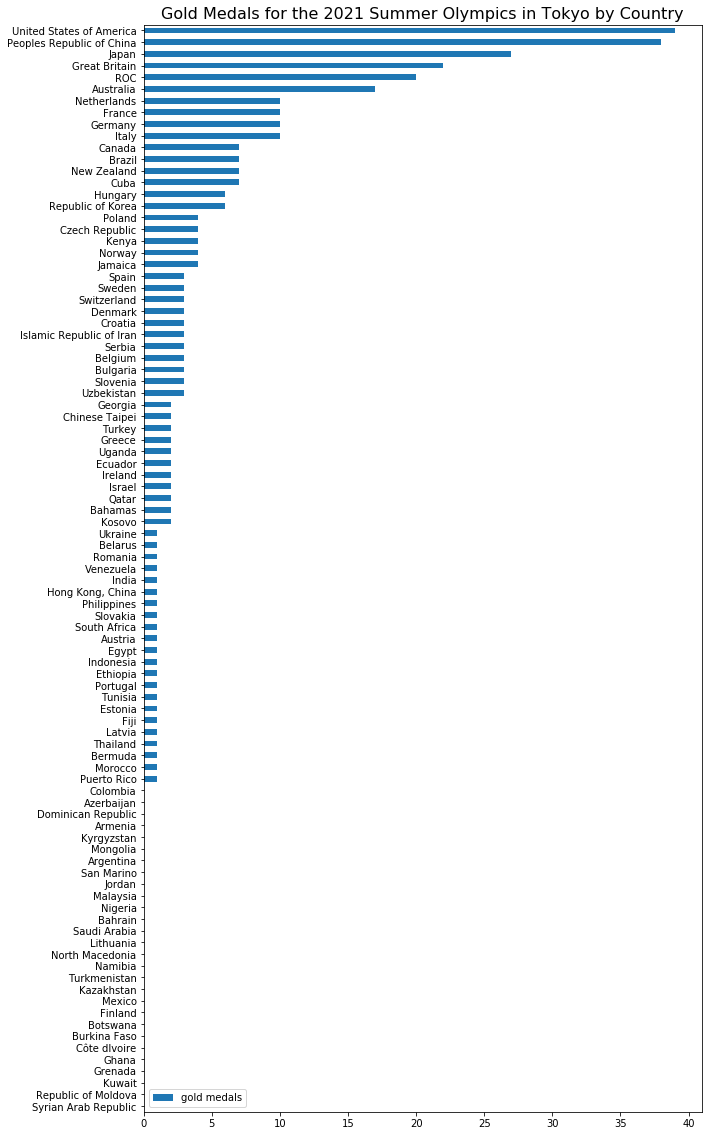

In [137]:
ax = medals_g.plot.barh(figsize = (10, 20))
plt.gca().invert_yaxis()
plt.title('Gold Medals for the 2021 Summer Olympics in Tokyo by Country', fontsize=16);

In [138]:
medals_s = pd.DataFrame({'silver medals' : silver_m,}, index=teams)

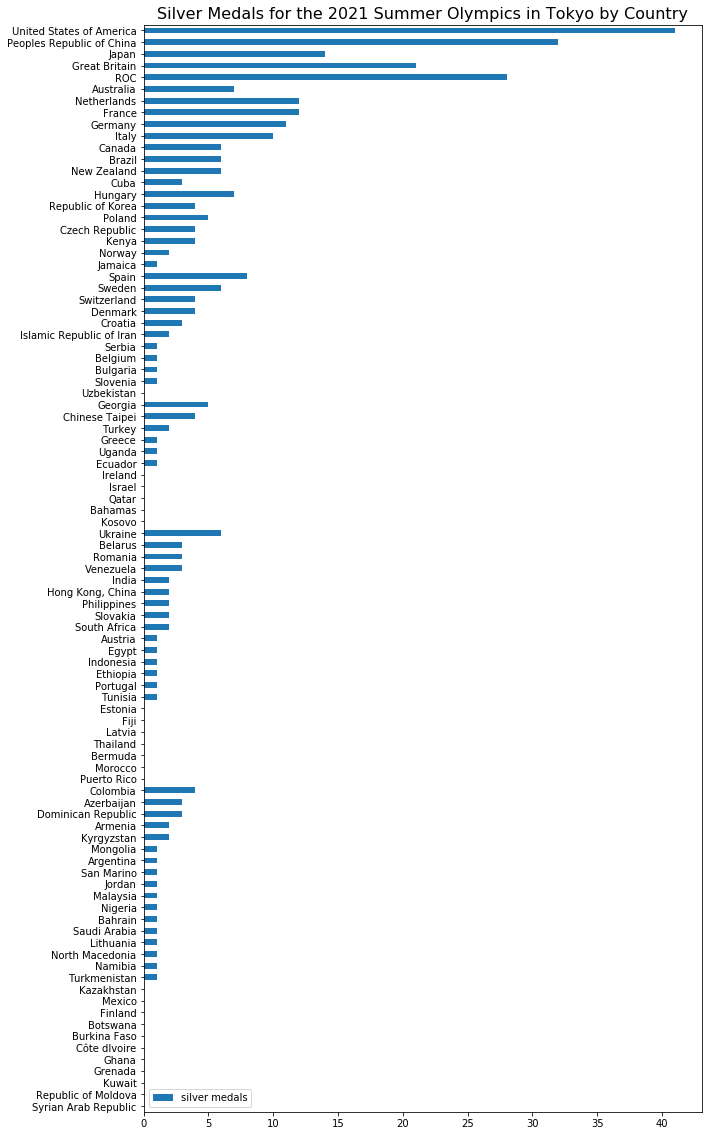

In [139]:
ax = medals_s.plot.barh(figsize = (10, 20))
plt.gca().invert_yaxis()
plt.title('Silver Medals for the 2021 Summer Olympics in Tokyo by Country', fontsize=16);

In [140]:
medals_b = pd.DataFrame({'bronze medals' : bronze_m,}, index=teams)

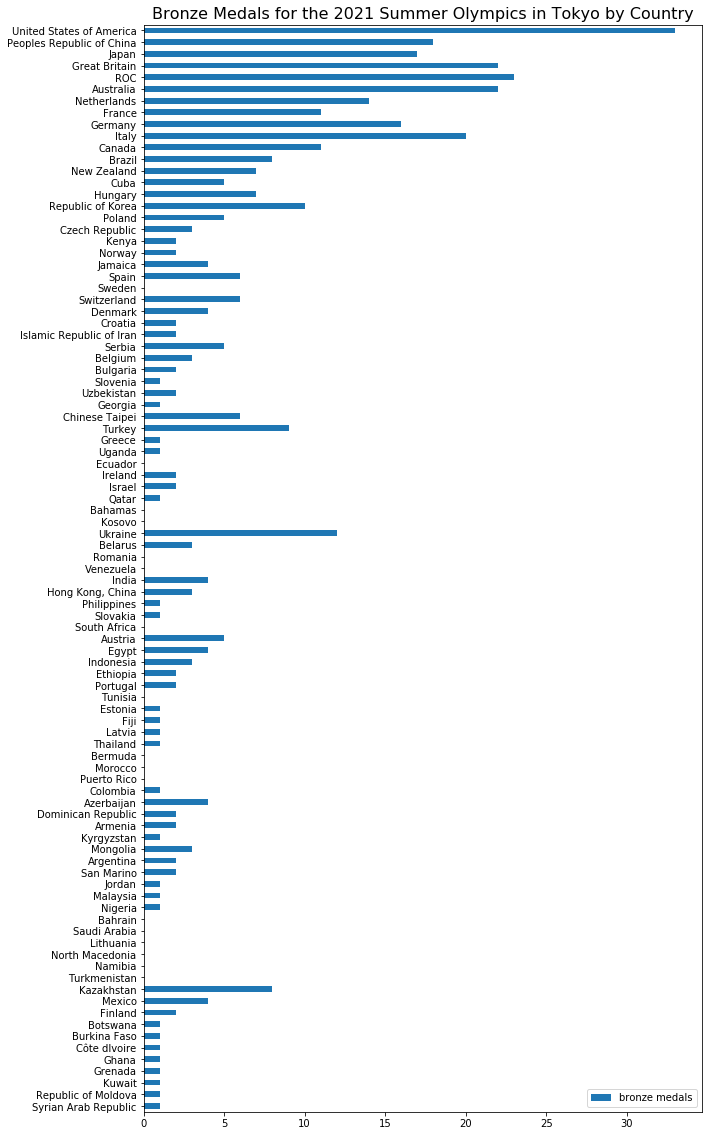

In [141]:
ax = medals_b.plot.barh(figsize = (10, 20))
plt.gca().invert_yaxis()
plt.title('Bronze Medals for the 2021 Summer Olympics in Tokyo by Country', fontsize=16);